In [2]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import fiona
import folium

In [3]:
layers = fiona.listlayers('data/canopy.gdb')

In [4]:
trees = gpd.read_file('data/canopy.gdb', layer=layers[0])

/Users/rujalshrestha/Projects/chc-property-prices/venv/lib/python3.13/site-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts. The processing may be really slow.  You can skip the processing by setting METHOD=SKIP, or only make it analyze counter-clock wise parts by setting METHOD=ONLY_CCW if you can assume that the outline of holes is counter-clock wise defined
  return ogr_read(


In [5]:
sa2 = gpd.read_file('data/chc-boundaries/statistical-area-2-2023-generalised.shp')

In [6]:
ta = gpd.read_file('data/chc-boundaries/territorial-authority-2021-generalised.gpkg')

In [7]:
ta.head()

,TA2021_V1_00,TA2021_V1_00_NAME,TA2021_V1_00_NAME_ASCII,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry
0,032,Central Hawke's Bay District,Central Hawke's Bay District,3333.140233,3333.140233,345764.275012,"MULTIPOLYGON (((1884831.019 5593384.334, 18848..."
1,033,New Plymouth District,New Plymouth District,2205.597503,2205.597503,376935.584957,"MULTIPOLYGON (((1687622.432 5675977.675, 16876..."
2,034,Stratford District,Stratford District,2163.422393,2163.422393,410331.506021,"MULTIPOLYGON (((1761018.863 5693193.903, 17610..."
3,035,South Taranaki District,South Taranaki District,3575.070736,3575.070736,374629.309041,"MULTIPOLYGON (((1671999.338 5662834.92, 167202..."
4,036,Ruapehu District,Ruapehu District,6734.415584,6734.415584,645988.018205,"MULTIPOLYGON (((1803138.895 5728331.12, 180343..."


In [8]:
ta_chc = ta[ta['TA2021_V1_00_NAME_ASCII'].str.lower().str.contains('christchurch')]

In [9]:
ta_chc.crs == sa2.crs

True

In [10]:
sa2_chc = sa2.clip(ta_chc)

<Axes: >

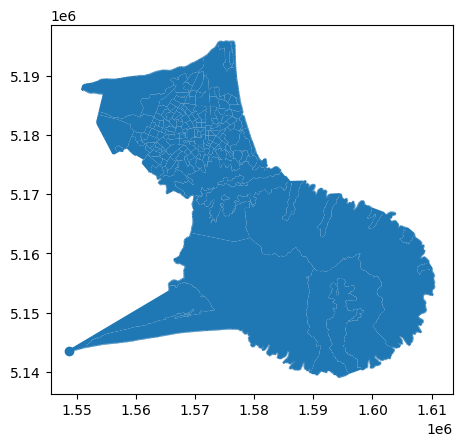

In [11]:
sa2_chc.plot()

In [12]:
trees_chc = gpd.clip(trees, sa2_chc)

In [13]:
sa2_chc = sa2_chc[sa2_chc.geometry.type.isin(['Polygon', 'MultiPolygon'])]
trees_chc = trees_chc[trees_chc.geometry.type.isin(['Polygon', 'MultiPolygon'])]

In [14]:
sa2_chc = sa2_chc.copy()
sa2_chc['geometry'] = sa2_chc['geometry'].buffer(0)

In [15]:
trees_sa2 = gpd.overlay(trees_chc, sa2_chc, how='intersection')

/Users/rujalshrestha/Projects/chc-property-prices/venv/lib/python3.13/site-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 15 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)


In [16]:
trees_sa2.head()

,Type,Shape_Length,Shape_Area,SA22023_V1,SA22023__1,SA22023__2,LAND_AREA_,AREA_SQ_KM,Shape_Leng,geometry
0,1.0,40.91485,34.706250,329001,Kennedys Bush,Kennedys Bush,9.879958,9.879958,24883.084332,"POLYGON ((1565275.3 5170093.5, 1565275.3 51700..."
1,1.0,111.14940,289.198200,329001,Kennedys Bush,Kennedys Bush,9.879958,9.879958,24883.084332,"POLYGON ((1565307.325 5170149.975, 1565307.325..."
2,1.0,44.70000,40.342552,329001,Kennedys Bush,Kennedys Bush,9.879958,9.879958,24883.084332,"POLYGON ((1565331.4 5170159.35, 1565331.4 5170..."
3,1.0,31.79980,41.473012,329001,Kennedys Bush,Kennedys Bush,9.879958,9.879958,24883.084332,"POLYGON ((1565313.475 5170188.825, 1565313.475..."
4,1.0,17.55020,13.173773,329001,Kennedys Bush,Kennedys Bush,9.879958,9.879958,24883.084332,"POLYGON ((1565328.475 5170188.075, 1565328.475..."


<Axes: >

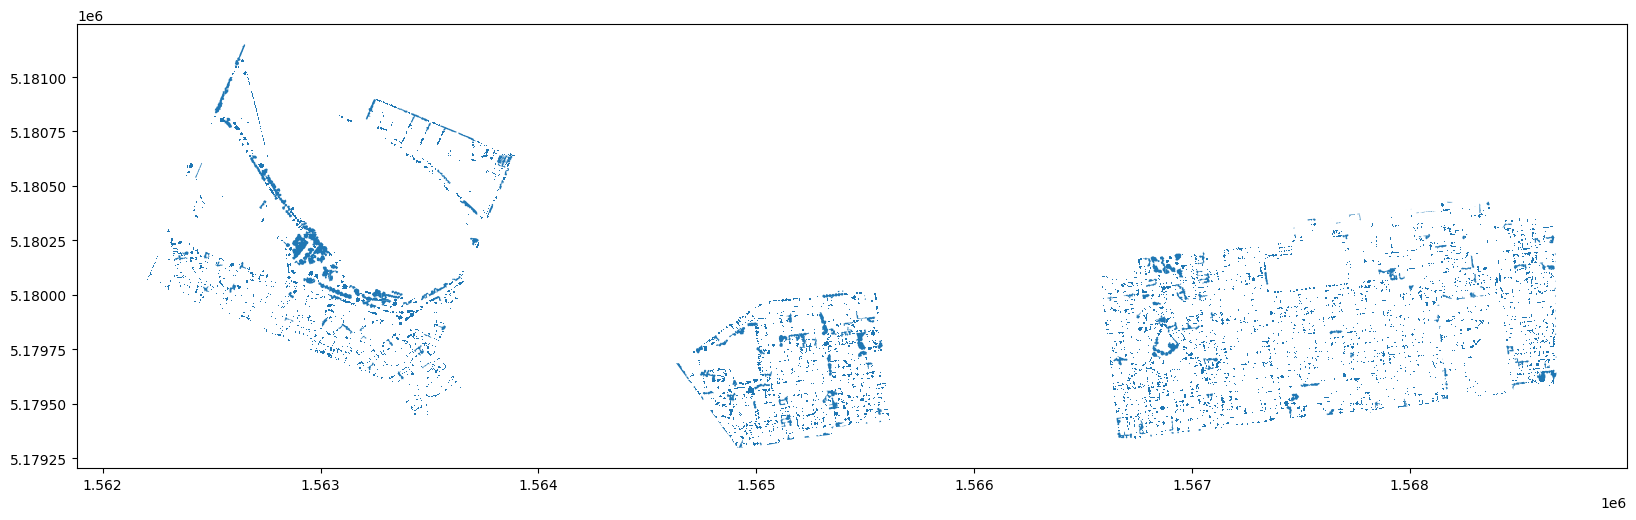

In [33]:
trees_sa2[trees_sa2['SA22023__2'].str.lower().str.contains('riccarton')].plot(figsize=(20, 20))

In [17]:
trees_sa2['canopy_area'] = trees_sa2.geometry.area

In [18]:
trees_sa2.head()

,Type,Shape_Length,Shape_Area,SA22023_V1,SA22023__1,SA22023__2,LAND_AREA_,AREA_SQ_KM,Shape_Leng,geometry,canopy_area
0,1.0,40.91485,34.706250,329001,Kennedys Bush,Kennedys Bush,9.879958,9.879958,24883.084332,"POLYGON ((1565275.3 5170093.5, 1565275.3 51700...",34.706250
1,1.0,111.14940,289.198200,329001,Kennedys Bush,Kennedys Bush,9.879958,9.879958,24883.084332,"POLYGON ((1565307.325 5170149.975, 1565307.325...",289.198200
2,1.0,44.70000,40.342552,329001,Kennedys Bush,Kennedys Bush,9.879958,9.879958,24883.084332,"POLYGON ((1565331.4 5170159.35, 1565331.4 5170...",40.342552
3,1.0,31.79980,41.473012,329001,Kennedys Bush,Kennedys Bush,9.879958,9.879958,24883.084332,"POLYGON ((1565313.475 5170188.825, 1565313.475...",41.473012
4,1.0,17.55020,13.173773,329001,Kennedys Bush,Kennedys Bush,9.879958,9.879958,24883.084332,"POLYGON ((1565328.475 5170188.075, 1565328.475...",13.173773


In [18]:
sa2_col = 'SA22023__2'
agg = trees_sa2.groupby(sa2_col)['canopy_area'].sum().reset_index()

In [19]:
agg.head()

,SA22023__2,canopy_area
0,Addington East,63897.337201
1,Addington North,4879.890094
2,Addington West,59402.602332
3,Aidanfield,94691.376769
4,Aranui,78140.333610


In [20]:
sa2_chc_tree_area = sa2_chc.merge(agg, on=sa2_col, how='left')
sa2_chc_tree_area['canopy_area'] = sa2_chc_tree_area['canopy_area'].fillna(0)

In [21]:
sa2_chc_tree_area.head()

,SA22023_V1,SA22023__1,SA22023__2,LAND_AREA_,AREA_SQ_KM,Shape_Leng,geometry,canopy_area
0,333000,Inland water Lake Ellesmere/Te Waihora South,Inland water Lake Ellesmere/Te Waihora South,0.000000,63.307834,75227.813029,"POLYGON ((1568104.426 5155107.987, 1568117.901...",0.000000e+00
1,329001,Kennedys Bush,Kennedys Bush,9.879958,9.879958,24883.084332,"POLYGON ((1567171.299 5174005.868, 1567173.105...",1.387753e+06
2,328001,Halswell South,Halswell South,1.484849,1.484849,7770.313430,"POLYGON ((1565413.089 5173594.491, 1565423.824...",1.612629e+05
3,324502,Halswell South West,Halswell South West,2.769174,2.769174,8065.210681,"POLYGON ((1564402.453 5174215.072, 1564514.665...",2.169748e+05
4,329002,Halswell South East,Halswell South East,2.422008,2.422008,8876.742339,"POLYGON ((1567177.866 5174470.325, 1566847.088...",1.512842e+05


In [22]:
sa2_chc_tree_area['sa2_area'] = sa2_chc_tree_area.geometry.area
sa2_chc_tree_area['tree_pct'] = (sa2_chc_tree_area['canopy_area']/sa2_chc_tree_area['sa2_area']) * 100

In [28]:
sa2_chc_tree_area.to_file('output/chc_trees.gpkg', driver='GPKG')

In [23]:
sa2_chc_tree_area.head()

,SA22023_V1,SA22023__1,SA22023__2,LAND_AREA_,AREA_SQ_KM,Shape_Leng,geometry,canopy_area,sa2_area,tree_pct
0,333000,Inland water Lake Ellesmere/Te Waihora South,Inland water Lake Ellesmere/Te Waihora South,0.000000,63.307834,75227.813029,"POLYGON ((1568104.426 5155107.987, 1568117.901...",0.000000e+00,6.330803e+07,0.000000
1,329001,Kennedys Bush,Kennedys Bush,9.879958,9.879958,24883.084332,"POLYGON ((1567171.299 5174005.868, 1567173.105...",1.387753e+06,9.880177e+06,14.045832
2,328001,Halswell South,Halswell South,1.484849,1.484849,7770.313430,"POLYGON ((1565413.089 5173594.491, 1565423.824...",1.612629e+05,1.484697e+06,10.861672
3,324502,Halswell South West,Halswell South West,2.769174,2.769174,8065.210681,"POLYGON ((1564402.453 5174215.072, 1564514.665...",2.169748e+05,2.769084e+06,7.835617
4,329002,Halswell South East,Halswell South East,2.422008,2.422008,8876.742339,"POLYGON ((1567177.866 5174470.325, 1566847.088...",1.512842e+05,2.422235e+06,6.245645


In [24]:
sa2_chc_tree_area.sort_values('tree_pct', ascending=False)

,SA22023_V1,SA22023__1,SA22023__2,LAND_AREA_,AREA_SQ_KM,Shape_Leng,geometry,canopy_area,sa2_area,tree_pct
177,317201,Styx,Styx,32.093176,32.093176,33695.361342,"POLYGON ((1574167.012 5194434.217, 1574296.193...",1.072048e+07,3.209359e+07,33.403795
125,324900,Hagley Park,Hagley Park,2.190632,2.190632,6211.504134,"POLYGON ((1569741.017 5181260.725, 1569769.317...",7.048720e+05,2.190472e+06,32.178999
88,330300,Cashmere West,Cashmere West,2.381178,2.381178,10141.477471,"POLYGON ((1570918.031 5176742.333, 1570933.917...",6.492558e+05,2.381261e+06,27.265211
39,322400,Deans Bush,Deans Bush,1.251768,1.251768,4723.730979,"POLYGON ((1567838.894 5180524.532, 1567802.673...",2.934373e+05,1.251696e+06,23.443172
29,321200,Ilam University,Ilam University,1.227167,1.227167,5392.364866,"POLYGON ((1565903.594 5181359.825, 1565926.068...",2.862683e+05,1.227148e+06,23.327929
...,...,...,...,...,...,...,...,...,...,...
73,332901,Diamond Harbour,Diamond Harbour,3.017963,3.017963,17520.202795,"POLYGON ((1579323.624 5170032.073, 1579326.739...",0.000000e+00,3.017954e+06,0.000000
72,332801,Teddington,Teddington,47.416814,47.416814,61943.263356,"MULTIPOLYGON (((1570213.688 5169772.936, 15702...",0.000000e+00,4.741691e+07,0.000000
71,333201,Banks Peninsula Eastern Bays,Banks Peninsula Eastern Bays,368.030995,368.030995,213391.264322,"MULTIPOLYGON (((1588695.861 5172159.489, 15886...",0.000000e+00,3.680310e+08,0.000000
70,333500,Akaroa,Akaroa,2.029935,2.029935,11499.900827,"POLYGON ((1597814.837 5150724.97, 1597855.848 ...",0.000000e+00,2.029934e+06,0.000000


In [25]:
chc_trees_wgs = sa2_chc_tree_area.to_crs(4326)

In [ ]:
union_geom = sa2_chc.union_all()
central_point = union_geom.centroid
central_point_wgs = gpd.GeoSeries([central_point], crs=2193).to_crs(4326).iloc[0]
lat, lon = central_point_wgs.y, central_point_wgs.x

m = folium.Map(
  location=[lat, lon],
  zoom_start=11,
  tiles='CartoDB Positron'
)

folium.Choropleth(
  geo_data=chc_trees_wgs,
  data=chc_trees_wgs,
  columns=[sa2_col, 'tree_pct'],
  key_on=f'feature.properties.SA22023__2',
  fill_col='RdYlGn',
  fill_opacity=0.75,
  line_opacity=0.3,
  legend_name='Tree Canopy Percentage (%)',
).add_to(m)

folium.GeoJson(
  chc_trees_wgs,
  tooltip=folium.features.GeoJsonTooltip(
    fields=['SA22023__2', 'tree_pct'],
    aliases=['Suburb:', 'Canopy (%):'],
    localize=True
  )
).add_to(m)

m